##  Import libraries

# Task-2

In [1]:
import numpy as np
import pandas as pd
import re

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

##  Import data

In [2]:
data = pd.read_csv("titanicdata.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(f'''The shape of data: {data.shape}''')

The shape of data: (891, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
round(data['Survived'].mean()*100,2)

38.38

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# columns which have nulls and the percentage of nulls in each column

data_na = (data.isnull().sum() / len(data)) *100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Percentage of nulls' :data_na , 'Number of nulls' : data[data_na.index].isna().sum()})
missing_data

,Percentage of nulls,Number of nulls
Cabin,77.104377,687
Age,19.865320,177
Embarked,0.224467,2


In [12]:
data[['Ticket']].duplicated().sum()/len(data)*100

23.56902356902357

In [13]:
#Drop PassengerId column 
data.drop(columns='PassengerId', inplace=True)

#Drop Cabin column.
data.drop(columns='Cabin', inplace=True)

#Drop Ticket column
data.drop(columns='Ticket', inplace=True)

In [14]:
#Imputing null values of Age column
    
mean = data["Age"].mean()
std = data["Age"].std()
nulls = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
random_age = np.random.randint(mean - std, mean + std, size = nulls)
    
# fill NaN values in Age column with random values generated
data["Age"][data["Age"].isna()] = random_age
data["Age"] = data["Age"].astype(int)
    
#Imputing null values of Embarked column
    
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)    
    

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
title_list = data['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1]).unique()
title_list

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' Countess', ' Jonkheer'], dtype=object)

In [17]:
# replacing all titles with mr, mrs, miss, master, and boy 
def replace_titles(x):
    title=x['Title'].strip()
    
    if (x['Age']<13): return 'Boy'
    
    if title in ['Don', 'Rev', 'Col','Capt','Sir','Major','Jonkheer']: return 'Mr'
    
    elif title in ['Countess', 'Mme']: return 'Mrs'
    
    elif title in ['Mlle', 'Ms','Lady','Dona']: return 'Miss'
    
    elif title =='Dr':
        
        if x['Sex']=='male': return 'Mr'
        else: return 'Mrs'
        
    else: return title

#create a new columns containing the title for each name
data['Title'] = data['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1])
    
#apply replacing title function to all titles
data['Title'] = data.apply(replace_titles, axis=1)

In [18]:
print(f'Data has : {data["Title"].unique()}')
print()
print(data["Title"].value_counts())

Data has : ['Mr' 'Mrs' 'Miss' 'Boy' 'Master']

Mr        536
Miss      154
Mrs       128
Boy        69
Master      4
Name: Title, dtype: int64


In [19]:
#drop Name column
data.drop(columns='Name', inplace=True)

In [20]:
#create FamilyCount column.
data['FamilyCount'] = data['SibSp'] + data['Parch']+1

In [21]:
data['FamilyCount'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilyCount, dtype: int64

In [22]:
#create IsAlone column.
data.loc[data['FamilyCount'] > 1, 'IsAlone'] = 0
data.loc[data['FamilyCount'] == 1, 'IsAlone'] = 1   
data['IsAlone'] = data['IsAlone'].astype(int)

In [23]:
data['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [24]:
data.groupby(['IsAlone', 'Survived'])['Survived'].count()

IsAlone  Survived
0        0           175
         1           179
1        0           374
         1           163
Name: Survived, dtype: int64

In [25]:
#drop SibSp and Parch column
data.drop(columns='SibSp', inplace=True)
data.drop(columns='Parch', inplace=True)

In [26]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,0,3,male,22,7.2500,S,Mr,2,0
1,1,1,female,38,71.2833,C,Mrs,2,0
2,1,3,female,26,7.9250,S,Miss,1,1
3,1,1,female,35,53.1000,S,Mrs,2,0
4,0,3,male,35,8.0500,S,Mr,1,1


# 4 | Exploratory Data Analysis(EDA)

In [27]:
# Add labels to the end of each bar in a bar chart.

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()-3

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = "{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),textcoords="offset points", ha='center', va=va)

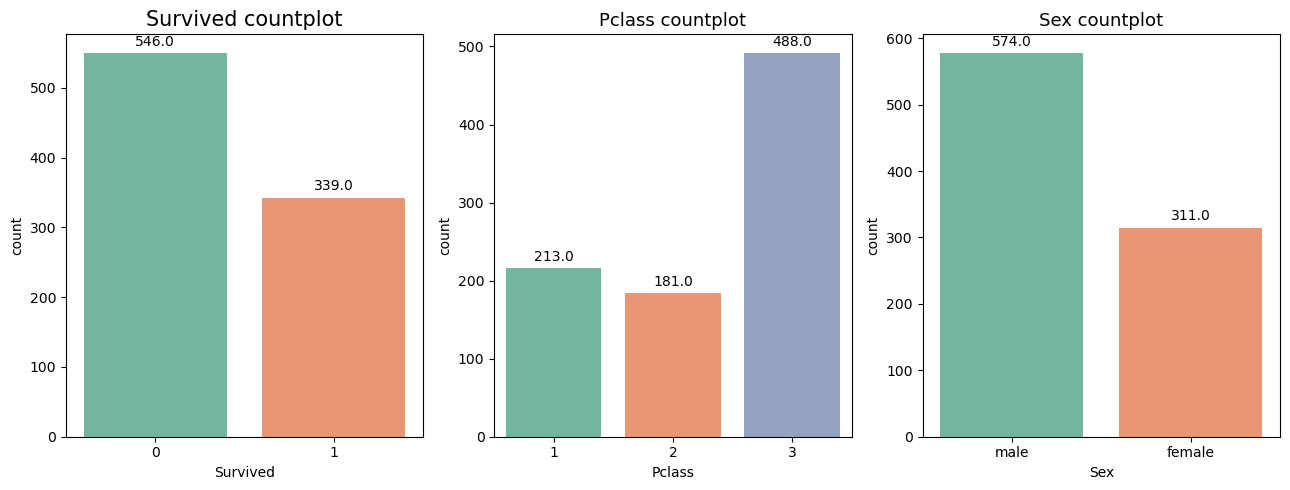

In [28]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Survived countplot', size=15)
plot= sns.countplot(data=data, x='Survived' ,palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Pclass countplot', size=13)
plot= sns.countplot(data=data, x='Pclass', palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Sex countplot', size=13)
plot= sns.countplot(data=data, x='Sex', palette='Set2')
add_value_labels(plot)

plt.tight_layout()

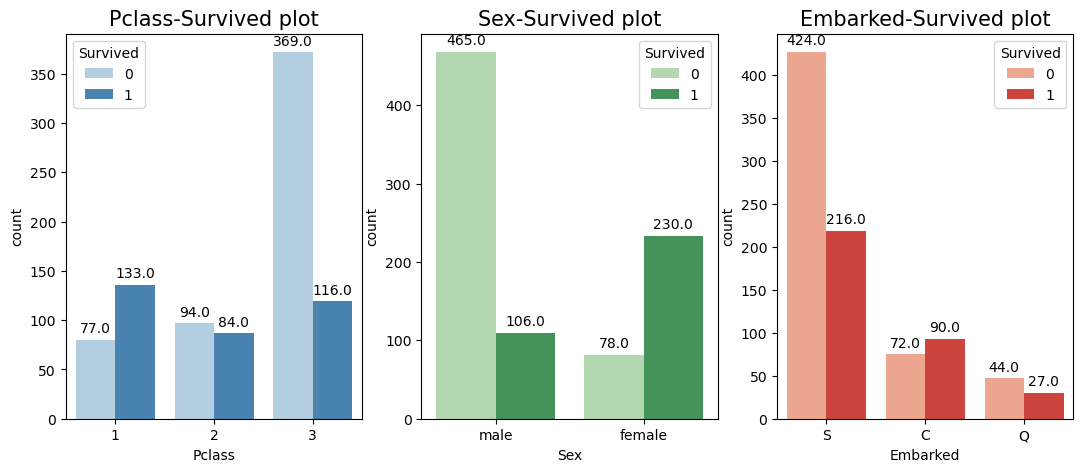

In [29]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Pclass-Survived plot', size=15)
plot= sns.countplot(data=data, x='Pclass',hue='Survived' ,palette="Blues")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Sex-Survived plot', size=15)
plot= sns.countplot(data=data, x='Sex', hue='Survived' ,palette="Greens")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Embarked-Survived plot', size=15)
plot= sns.countplot(data=data, x='Embarked',hue='Survived' ,palette="Reds")
add_value_labels(plot)

In [30]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [32]:
#survived passengers
survived_passengers= data[data['Survived']==1]

#non-survived passengers
unsurvived_passengers= data[data['Survived']==0]

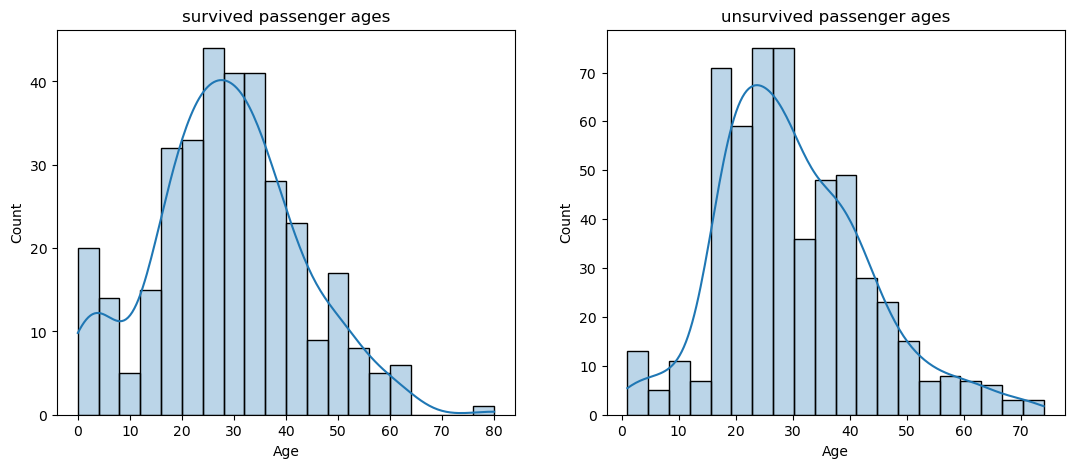

In [33]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_passengers, x='Age', kde=True, bins=20,  alpha=0.3 );

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_passengers, x='Age', kde=True, bins=20, alpha=0.3 );

In [34]:
Infant_passengers = data[data['Age']<=5]
Infant_passengers['Survived'].value_counts(normalize=True)

1    0.704545
0    0.295455
Name: Survived, dtype: float64

In [35]:
Old_passengers = data[data['Age']==80]
Old_passengers['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

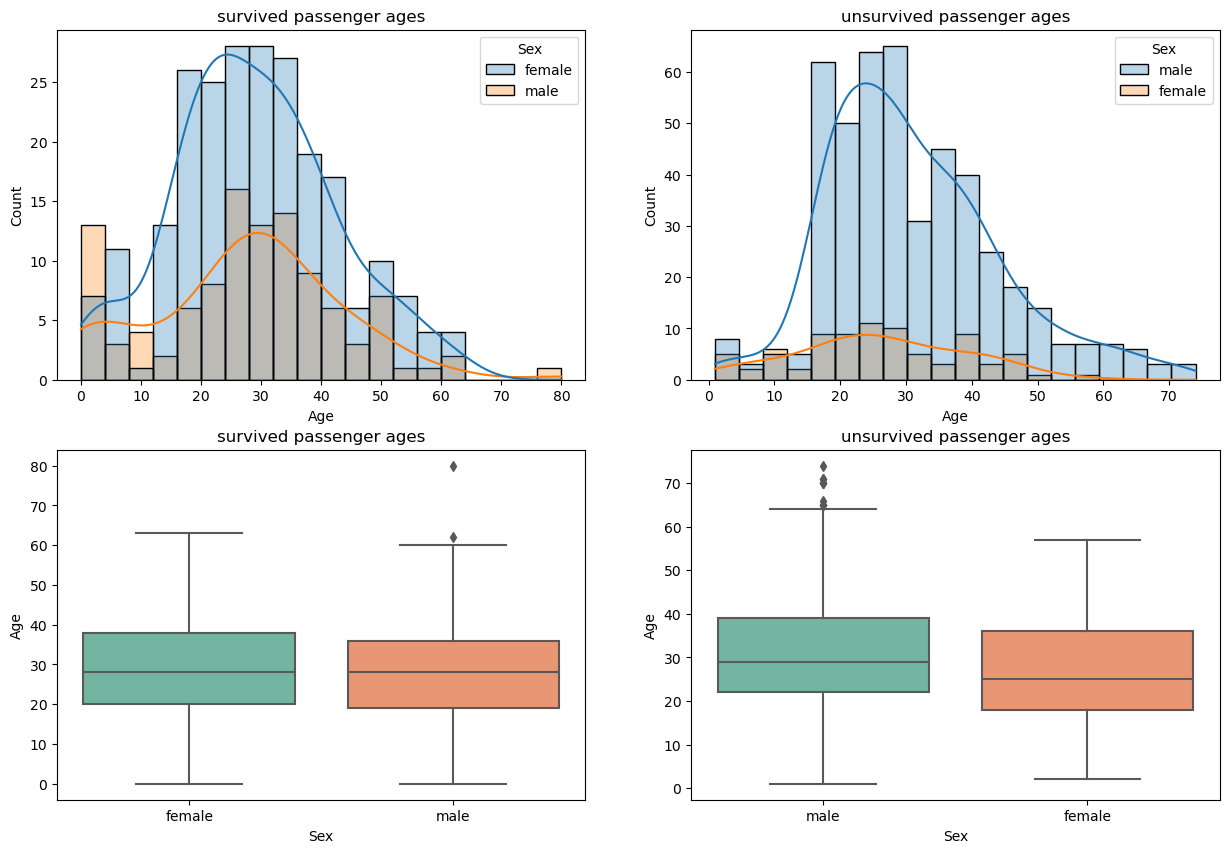

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_passengers, x='Age', hue='Sex', kde=True, bins=20,  alpha=0.3 );

plt.subplot(2,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_passengers, x='Age',hue='Sex', kde=True, bins=20, alpha=0.3 );

plt.subplot(2,2,3)
plt.title('survived passenger ages')
sns.boxplot(x=survived_passengers['Sex'], y=data["Age"],palette="Set2");

plt.subplot(2,2,4)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_passengers['Sex'], y=data["Age"],palette="Set2");

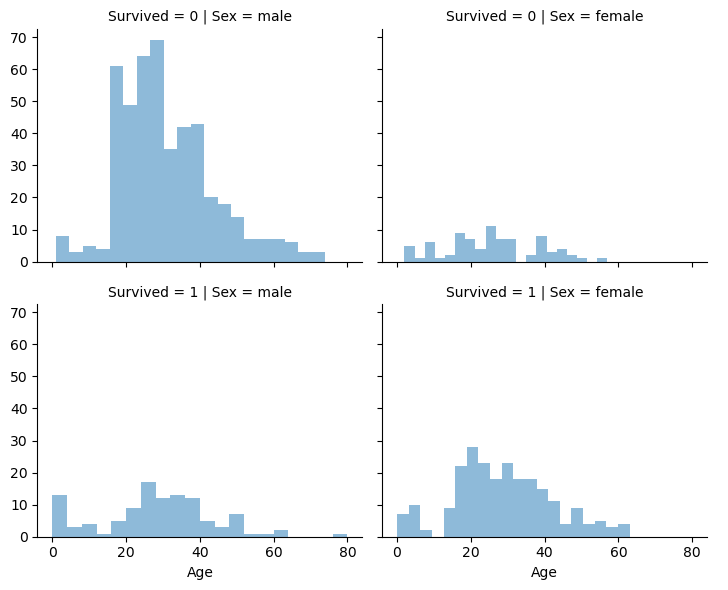

In [37]:
grid = sns.FacetGrid(data, col='Sex', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [37]:
print('surviving male passengers \n')

print(survived_passengers[survived_passengers['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('surviving female passengers \n')

print(survived_passengers[survived_passengers['Sex']=='female'][['Age']].describe().T)

surviving male passengers 

     count       mean       std  min   25%   50%   75%   max
Age  109.0  27.587156  15.63366  0.0  19.0  28.0  36.0  80.0
--------------------------------
surviving female passengers 

     count       mean        std  min   25%   50%   75%   max
Age  233.0  28.849785  13.495808  0.0  20.0  28.0  38.0  63.0


In [38]:
print('non-surviving male passengers \n')

print(unsurvived_passengers[unsurvived_passengers['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('non-surviving female passengers \n')

print(unsurvived_passengers[unsurvived_passengers['Sex']=='female'][['Age']].describe().T)

non-surviving male passengers 

     count       mean        std  min   25%   50%   75%   max
Age  468.0  31.051282  13.039125  1.0  22.0  29.0  39.0  74.0
--------------------------------
non-surviving female passengers 

     count       mean        std  min   25%   50%   75%   max
Age   81.0  26.012346  12.748033  2.0  18.0  25.0  36.0  57.0


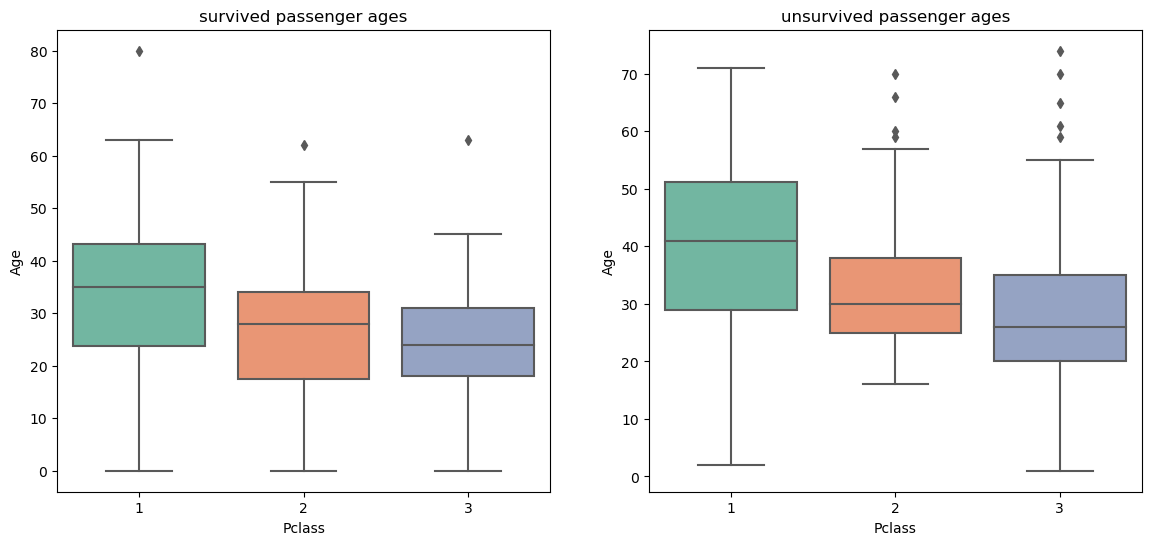

In [39]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.boxplot(x=survived_passengers['Pclass'], y=data["Age"],palette="Set2");

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_passengers['Pclass'], y=data["Age"],palette="Set2");

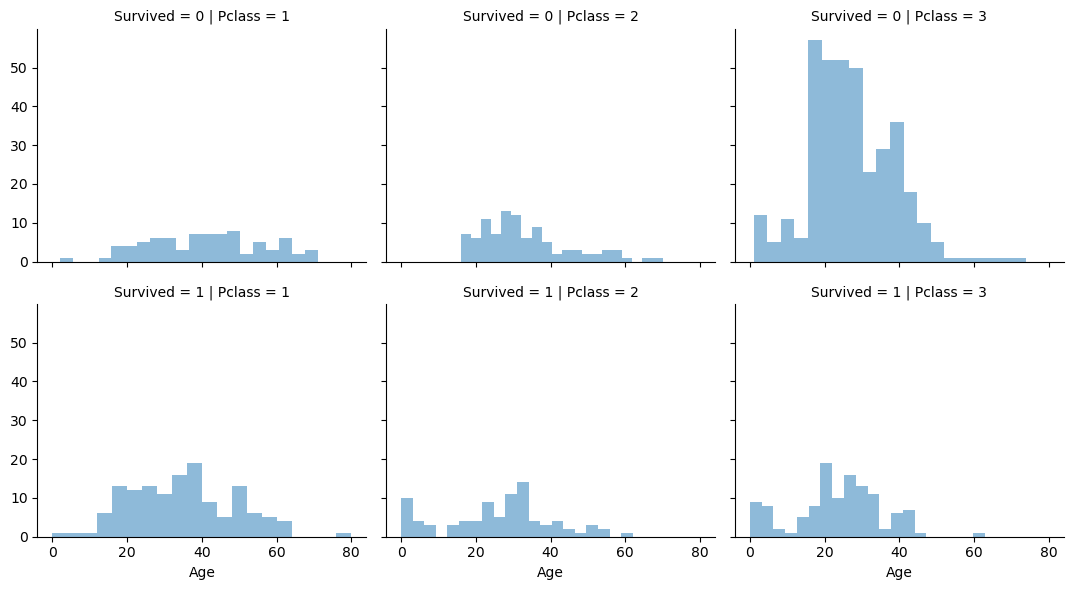

In [40]:
grid = sns.FacetGrid(data, col='Pclass', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

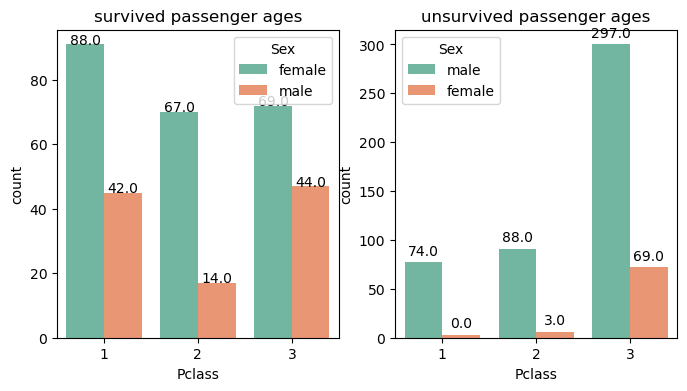

In [41]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

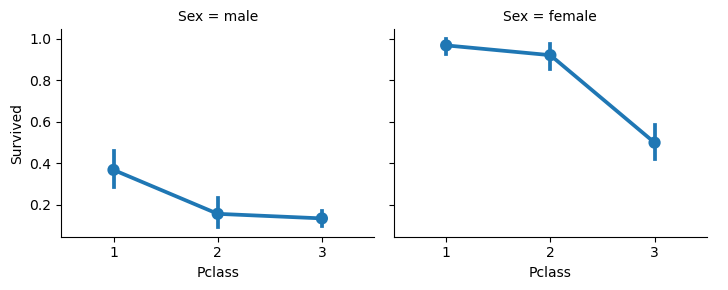

In [42]:
grid = sns.FacetGrid(data, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'Pclass', 'Survived')
grid.add_legend();

In [43]:
#survived passengers
survived_passengers= data[data['Survived']==1]

#non-survived passengers
unsurvived_passengers= data[data['Survived']==0]

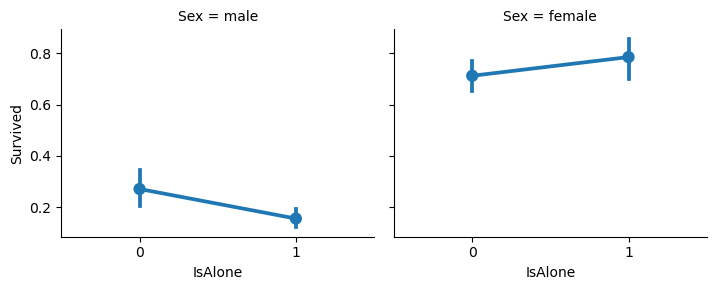

In [44]:
grid = sns.FacetGrid(data, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'IsAlone', 'Survived')
grid.add_legend();

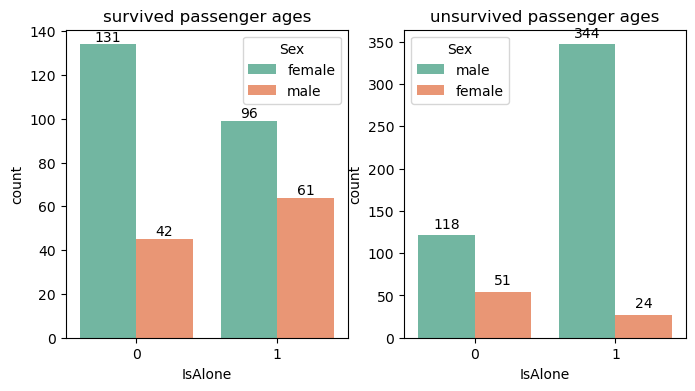

In [46]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

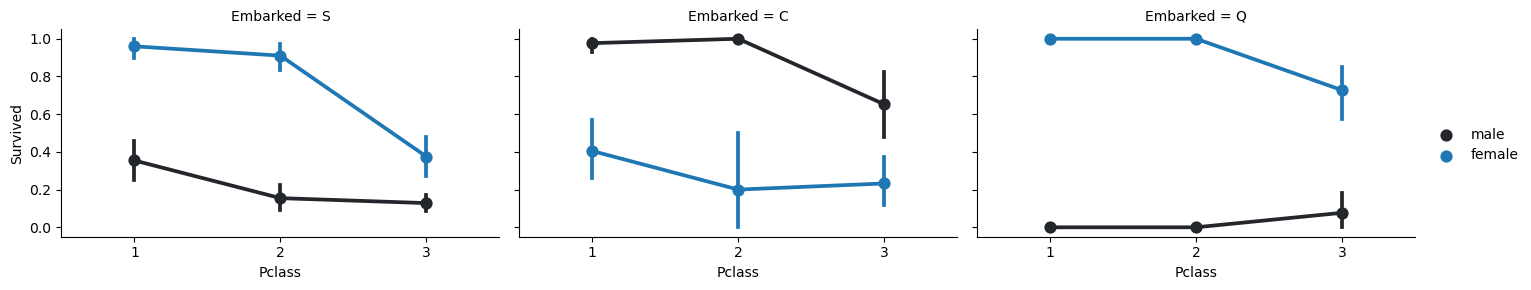

In [45]:
grid = sns.FacetGrid(data, col='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend();

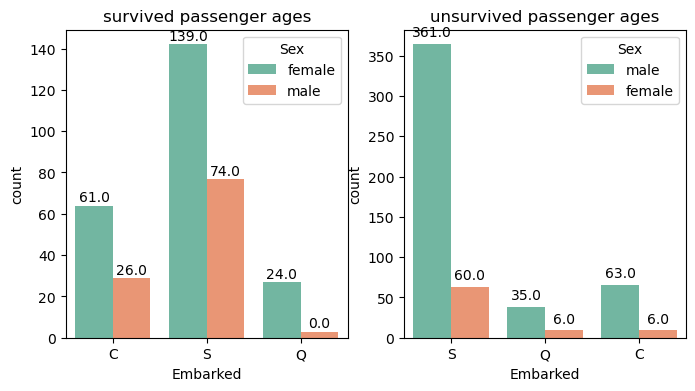

In [46]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

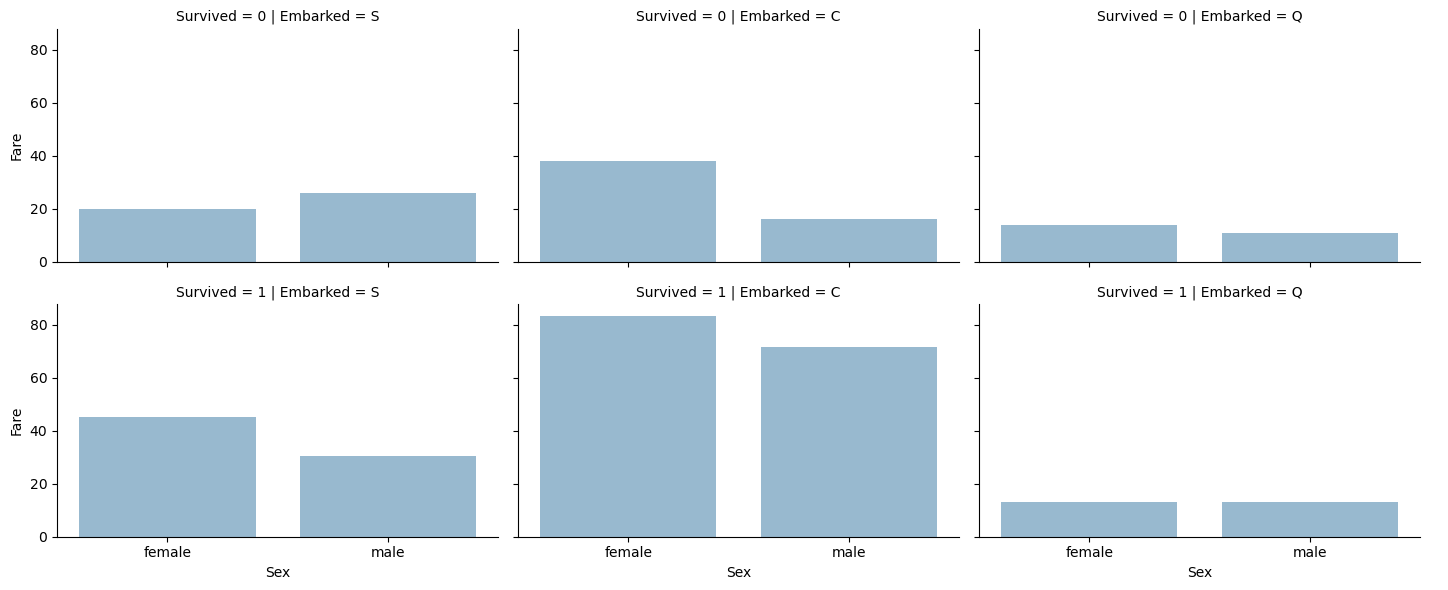

In [47]:
grid = sns.FacetGrid(data, col='Embarked', row='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();